In [55]:
from __future__ import print_function, division, absolute_import

import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import safeopt

mpl.rcParams['figure.figsize'] = (20.0, 10.0)
mpl.rcParams['font.size'] = 20
mpl.rcParams['lines.markersize'] = 20

max is: 2.4561968330887662


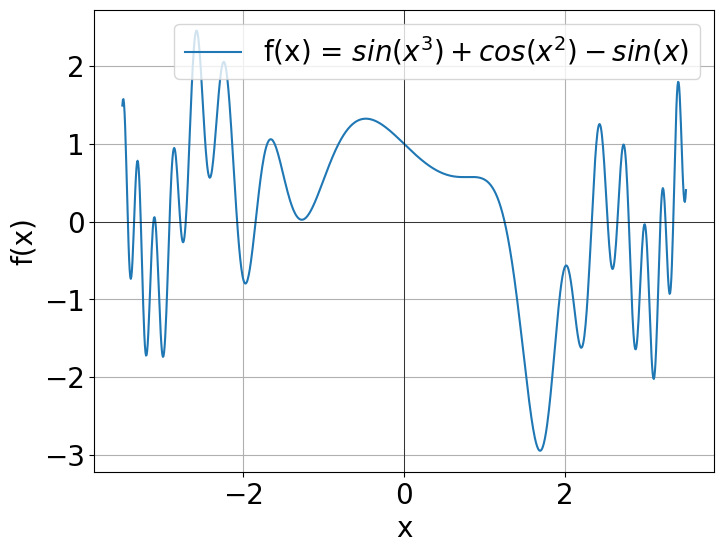

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the function
def f(x):
    f = np.sin(x**3) + np.cos(x**2) - np.sin(x)
    print("max is:", np.max(f))
    return np.sin(x**3) + np.cos(x**2) - np.sin(x)

# Generating x values
x = np.linspace(-3.5, 3.5, 1000)

# Generating y values
y = f(x)

# Plotting the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = $sin(x^3) + cos(x^2)- sin(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.legend()
plt.show()


In [57]:
bounds = [(-10,10)]

parameter_set = safeopt.linearly_spaced_combinations(bounds, 1000)

kernel = GPy.kern.RBF(input_dim=len(bounds), variance=2., lengthscale=1.)


x0 = np.asarray(([2.0],[2.0]))
print(x0)

[[2.]
 [2.]]


In [58]:
noise_var = 0.05 ** 2
print(f(x0))
gp = GPy.models.GPRegression(x0, f(x0), kernel, noise_var=noise_var)

opt = safeopt.SafeOpt(gp, parameter_set, 0.0,beta=3.5,threshold=0.2)


max is: -0.5735828010659119
[[-0.5735828]
 [-0.5735828]]
max is: -0.5735828010659119


In [59]:
def plot_gp():

    opt.plot(1000)
    plt.plot(parameter_set,f(parameter_set),color='C2', alpha=0.8)

In [60]:
x_next = opt.optimize()

y_meas = f(x_next)
opt.add_new_data_point(x_next, y_meas)



plot_gp()

OSError: There are no safe points to evaluate.

In [ ]:
bounds =[(-2.5,2.5)]
x0 = np.zeros((1, len(bounds)))

def global_function(x1,x2,x3):
    return np.sin(x1**3) + np.cos(x2**2) - np.sin(x3)

class Agent:
    def __init__(self,bounds,kernel,x0,noise_var=0.05**2):
        np.random.seed(np.random.randint(0,1000))

        self.bounds = bounds
        self.kernel =GPy.kern.RBF(input_dim=len(bounds), variance=2., lengthscale=1.)
        self.x0 = x0
        parameter_set = safeopt.linearly_spaced_combinations(bounds, 1000)
        self.gp = GPy.models.GPRegression(x0,global_function(x0,x0,x0) , kernel, noise_var=noise_var) #initiallize gp with initial safe point
        self.opt = safeopt.SafeOpt(self.gp, parameter_set, 0.0,beta=3.5,threshold=0.2)

    def predict(self):
        return self.opt.optimize()
    
    def update(self,x_next,y_meas):
        self.opt.add_new_data_point(x_next, y_meas)

    def plot_gp(self):
        self.opt.plot(1000)
        plt.plot(parameter_set,global_function(parameter_set,parameter_set,parameter_set),color='C2', alpha=0.8)


In [ ]:
agents = [Agent(bounds,kernel,x0) for i in range(3)]

[array([-0.3978979]), array([-0.3978979]), array([-0.3978979])]


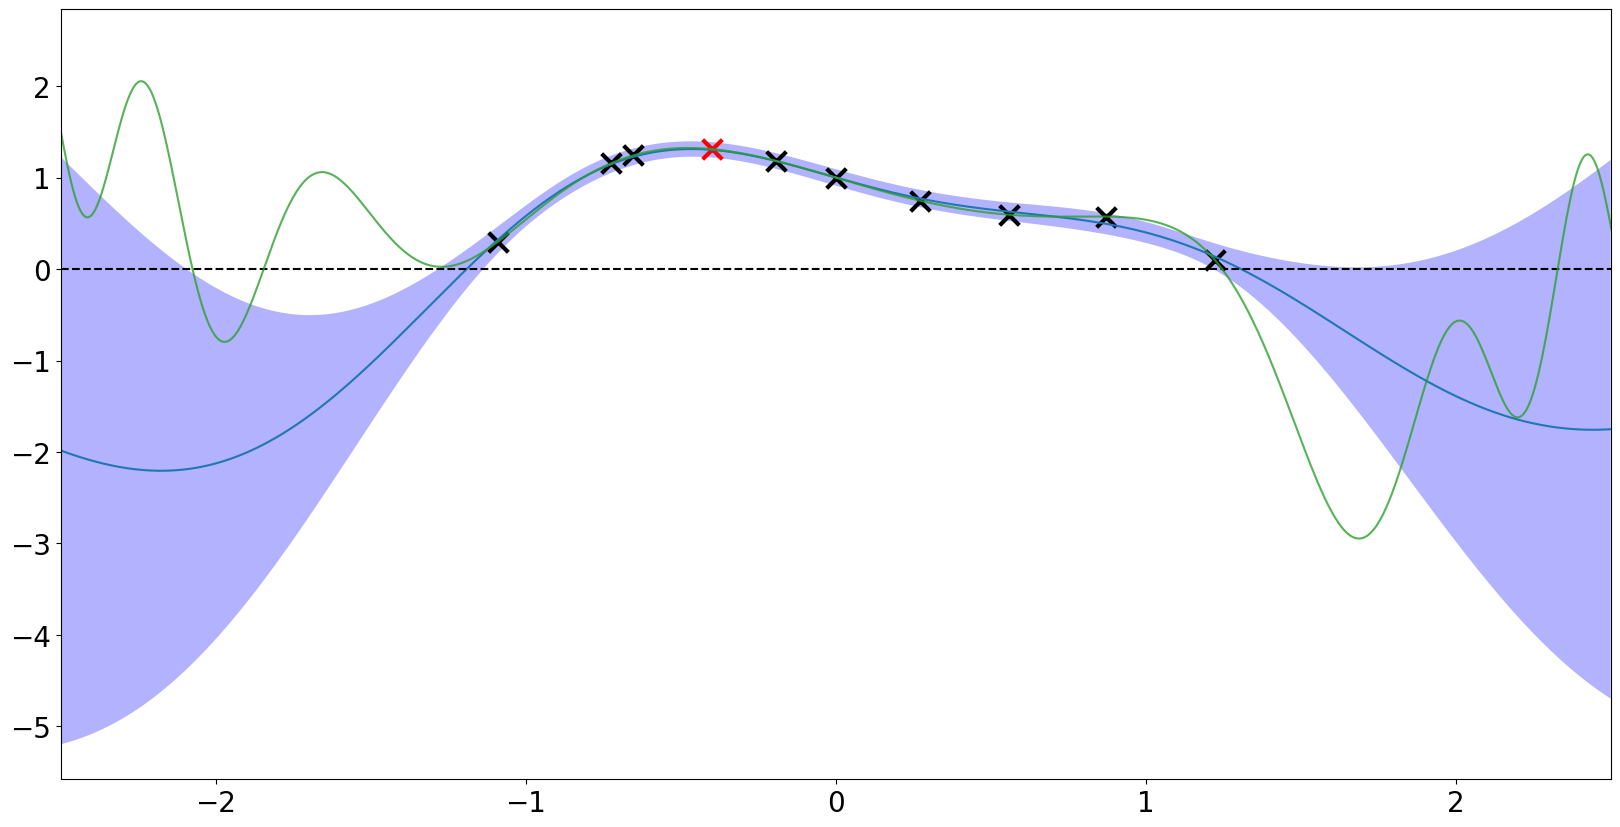

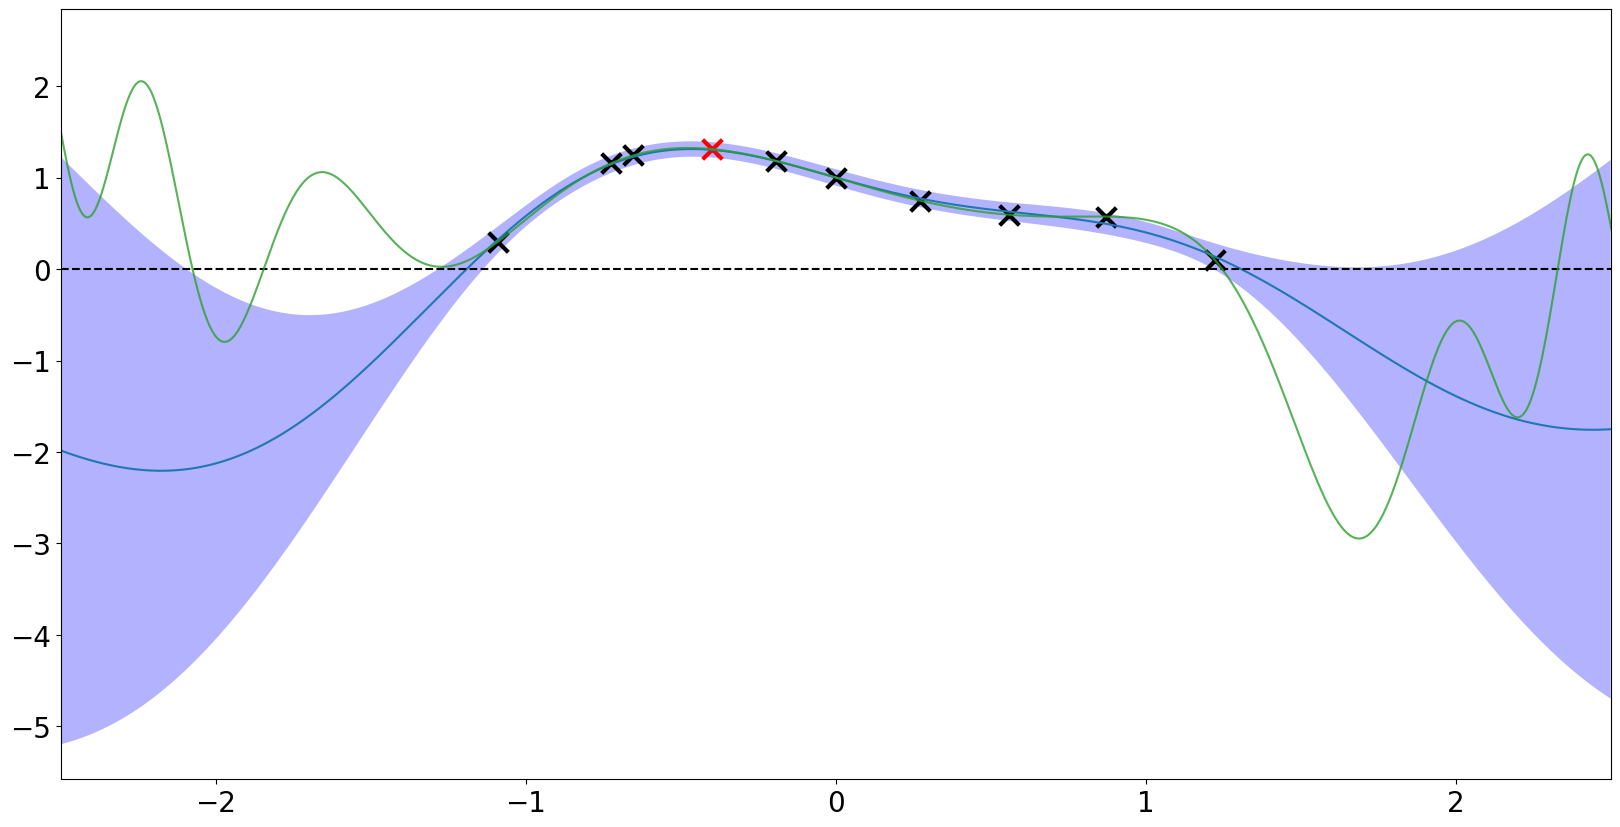

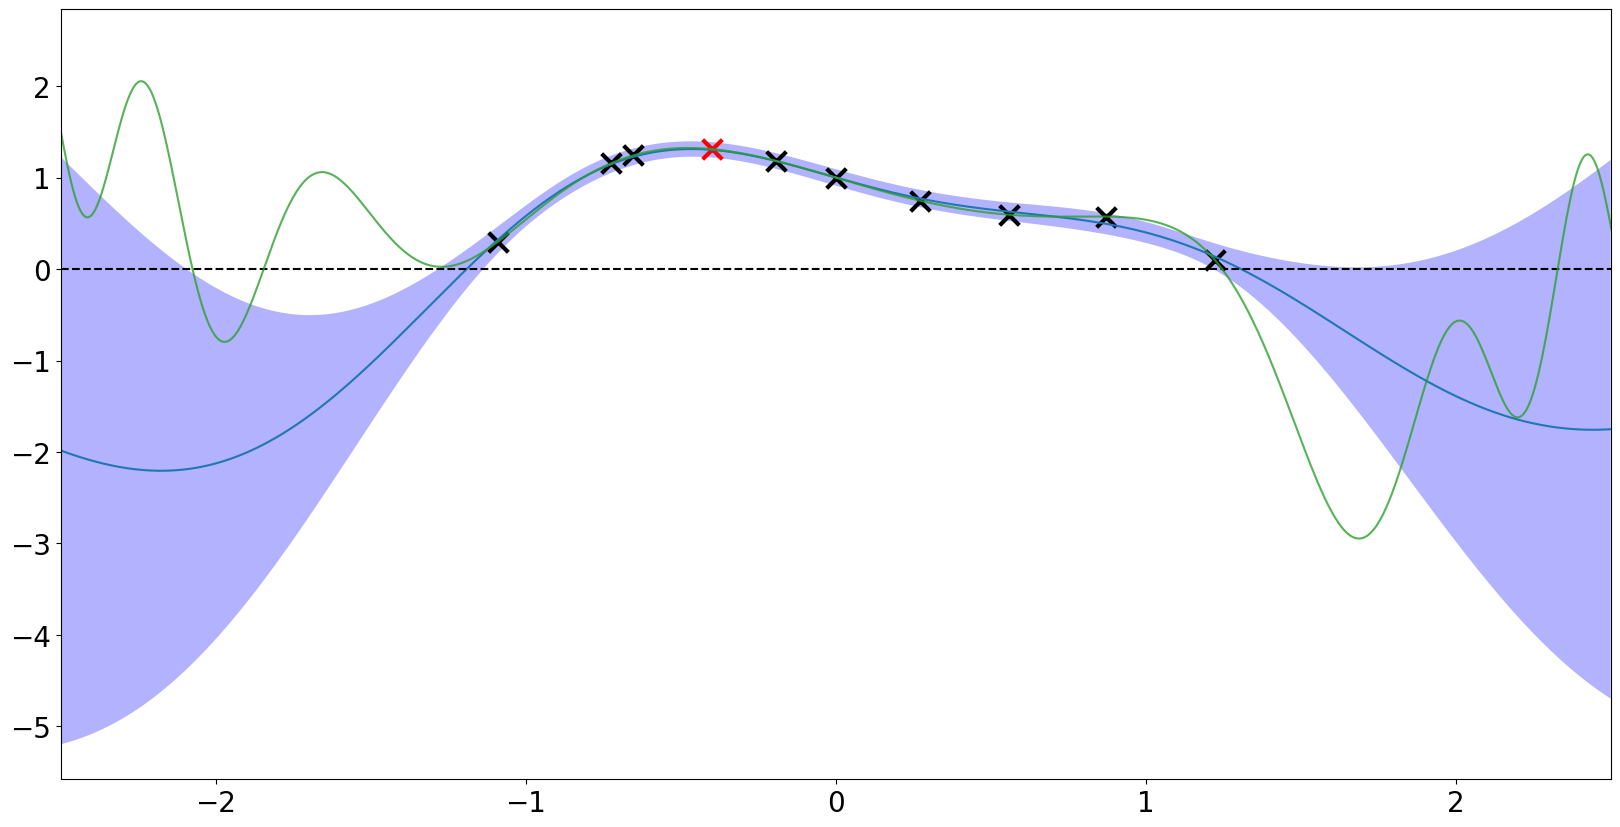

In [ ]:

x_next = [agent.predict() for agent in agents]
print(x_next)
y_means = global_function(x_next[0],x_next[1],x_next[2])
for i,agent in enumerate(agents):
    agent.update(x_next[i],y_means)
    agent.plot_gp()
